### Objective

## importing the libraries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats
import statsmodels.formula.api as sm
#import pandas_profiling

plt.rcParams['figure.figsize'] = 10,7.5
plt.rcParams['axes.grid'] = True
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

<Figure size 720x540 with 0 Axes>

### Definition of Target and Outcome Window 

## Data Pre-Processing

### EXploratory Data analysis

### Model building and model diagnostics

### Data Pre-Processing

In [5]:
df_bank_loans=pd.read_csv('bankloans.csv')

In [6]:
df_bank_loans.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


#### checking for null values

In [7]:
df_bank_loans.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [8]:
### checking the shape
df_bank_loans.shape

(850, 9)

In [46]:
### generic functions for data explorations
def var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.mean(),x.median(),x.std(),x.var(),x.min(),
                     x.dropna().quantile(0.01),x.dropna().quantile(0.05),x.dropna().quantile(0.1),x.dropna().quantile(0.25),x.dropna().quantile(0.5),x.dropna().quantile(0.75),
                      x.dropna().quantile(0.9),x.dropna().quantile(0.95),x.dropna().quantile(0.99),x.max()],
                      index=['N','NMISS','SUM','MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX']
                     )

## function for outlier capping
def outlier_capping(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return x

## function for missing_value_imputation
def missing_imputation(x):
    x=x.fillna(x.mean())
    return x

In [21]:
df_bank_loans.apply(lambda x:var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,850.0,0.0,29775.000000,35.029412,34.000000,8.041432,64.664623,20.000000,21.000000,23.000000,25.000000,29.000000,34.000000,41.000000,47.000000,49.000000,53.000000,56.00000
ed,850.0,0.0,1454.000000,1.710588,1.000000,0.927784,0.860783,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,4.000000,5.00000
employ,850.0,0.0,7281.000000,8.565882,7.000000,6.777884,45.939706,0.000000,0.000000,0.000000,1.000000,3.000000,7.000000,13.000000,18.000000,21.550000,29.000000,33.00000
address,850.0,0.0,7116.000000,8.371765,7.000000,6.895016,47.541251,0.000000,0.000000,0.000000,1.000000,3.000000,7.000000,12.000000,19.000000,22.550000,26.510000,34.00000
income,850.0,0.0,39674.000000,46.675294,35.000000,38.543054,1485.566998,13.000000,14.490000,17.000000,19.000000,24.000000,35.000000,55.750000,84.000000,115.550000,220.510000,446.00000
debtinc,850.0,0.0,8645.900000,10.171647,8.700000,6.719441,45.150891,0.100000,0.900000,1.900000,2.900000,5.100000,8.700000,13.800000,19.200000,23.510000,31.565000,41.30000
creddebt,850.0,0.0,1340.284021,1.576805,0.885091,2.125840,4.519196,0.011696,0.030349,0.108927,0.178306,0.382176,0.885091,1.898440,3.703304,5.348674,10.285997,20.56131
othdebt,850.0,0.0,2616.970979,3.078789,2.003243,3.398803,11.551864,0.045584,0.162394,0.359900,0.552050,1.045942,2.003243,3.903001,7.111941,9.481105,16.931503,35.19750
default,700.0,150.0,183.000000,0.261429,0.000000,0.439727,0.193360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000


## checking ther target variable

In [22]:
df_bank_loans['default'].isnull().sum()

150

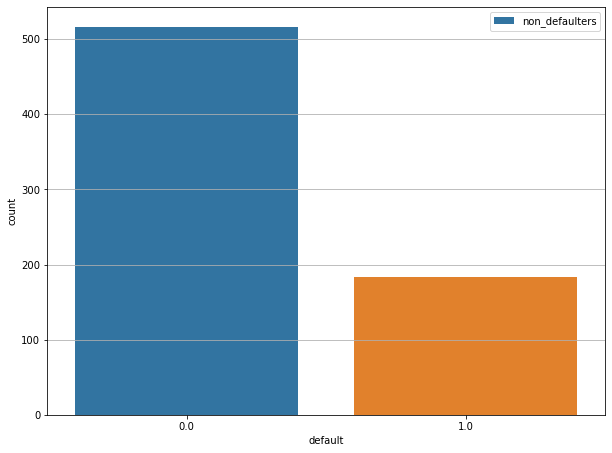

In [34]:
sns.countplot(df_bank_loans['default'])
plt.legend({'non_defaulters':0,'defaulters':1})
plt.show()

In [36]:
df_bank_loans_exisitng=df_bank_loans[df_bank_loans.default.isnull()==0]
df_bank_loans_new=df_bank_loans[df_bank_loans.default.isnull()==1]

In [43]:
### outlier handling using capping method
df_bank_loans_exisitng=df_bank_loans_exisitng.apply(lambda x:outlier_capping(x))

In [45]:
df_bank_loans_exisitng.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41.0,3,17.0,12.0,176.0,9.3,9.891428,5.008608,1.0
1,27.0,1,10.0,6.0,31.0,17.3,1.362202,4.000798,0.0
2,40.0,1,15.0,14.0,55.0,5.5,0.856075,2.168925,0.0
3,41.0,1,15.0,14.0,120.0,2.9,2.658720,0.821280,0.0
4,24.0,2,2.0,0.0,28.0,17.3,1.787436,3.056564,1.0


In [47]:
## missing value imputation
df_bank_loans_exisitng=df_bank_loans_exisitng.apply(lambda x:missing_imputation(x))

In [51]:
numeric_variables=df_bank_loans_exisitng.select_dtypes(include=('int64','float64'))

In [52]:
categorical_variables=df_bank_loans_exisitng.select_dtypes(include=('object'))

### correlation

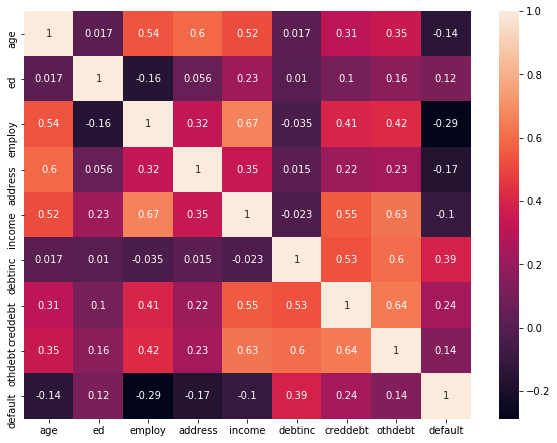

In [53]:
sns.heatmap(df_bank_loans_exisitng.corr(),annot=True)
plt.show()

### whiskers plot

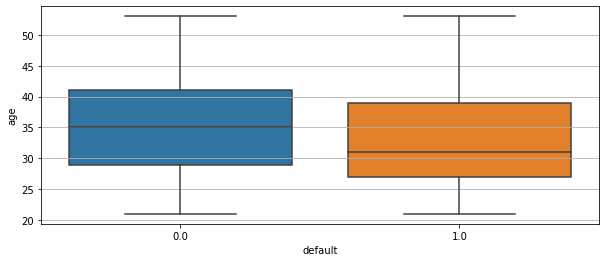

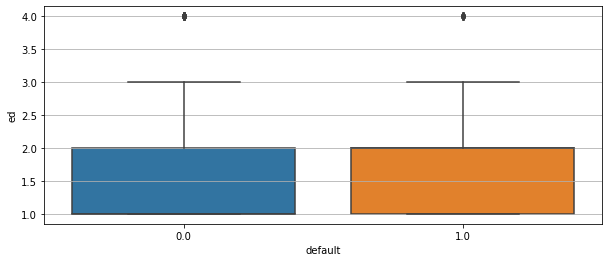

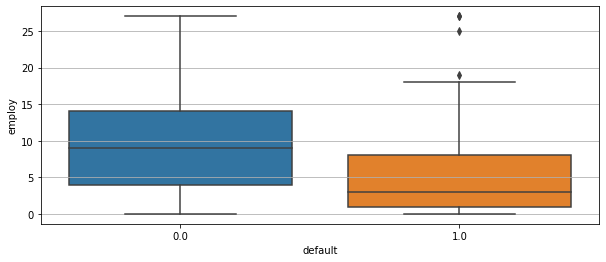

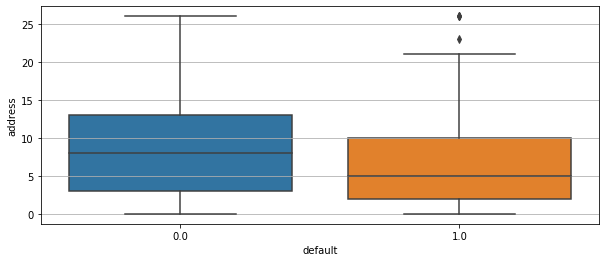

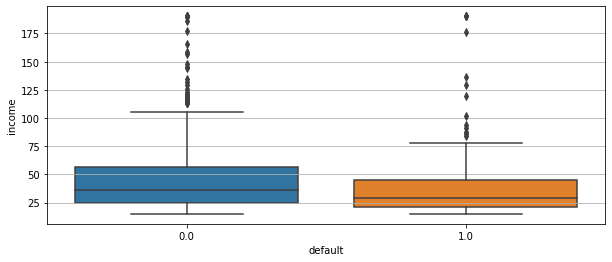

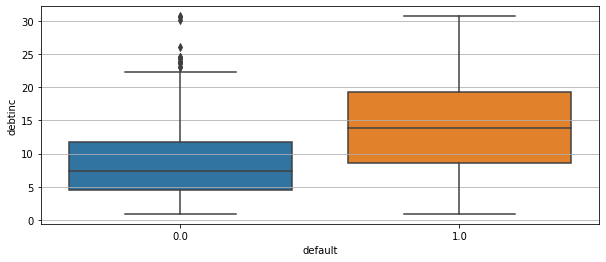

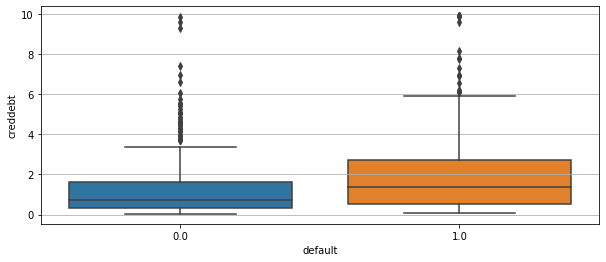

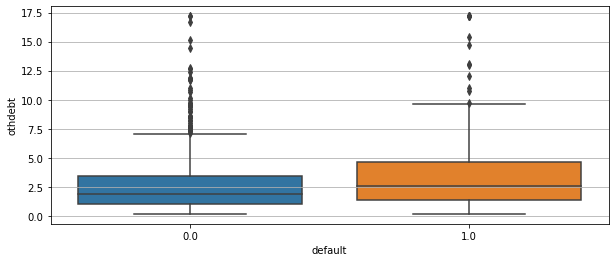

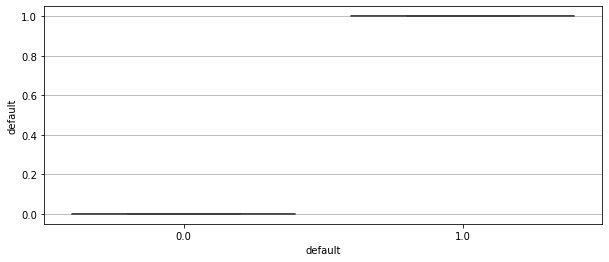

In [56]:
bp=PdfPages('Boxplots with default split')
for num in numeric_variables:
    fig,axes=plt.subplots(figsize=(10,4))
    sns.boxplot(x='default',y=num,data=df_bank_loans_exisitng)
    bp.savefig(fig)
bp.close()

### Insights

### BiVariate analysis

In [61]:
df_bank_loans_exisitng.columns.difference(['default'])

Index(['address', 'age', 'creddebt', 'debtinc', 'ed', 'employ', 'income',
       'othdebt'],
      dtype='object')

In [65]:
stats.ttest_ind(df_bank_loans_exisitng[df_bank_loans_exisitng['default']==0]['age'],df_bank_loans_exisitng[df_bank_loans_exisitng['default']==1]['age'])

Ttest_indResult(statistic=3.6989325593347377, pvalue=0.00023352682115362439)

In [69]:
tstats_df=pd.DataFrame( )
for num in df_bank_loans_exisitng.columns.difference(['default']):
    tstats=stats.ttest_ind(df_bank_loans_exisitng[df_bank_loans_exisitng['default']==1][num],df_bank_loans_exisitng[df_bank_loans_exisitng['default']==0][num])
    temp=pd.DataFrame([num,tstats[0],tstats[1]]).T
    temp.columns=['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df=pd.concat([tstats_df,temp],axis=0,ignore_index=True)
print(tstats_df)

  Variable Name T-Statistic      P-Value
0       address    -4.43055  1.09104e-05
1           age    -3.69893  0.000233527
2      creddebt     6.47909   1.7428e-10
3       debtinc     11.1409  1.20241e-26
4            ed     3.15351   0.00168236
5        employ    -7.92136  9.27995e-15
6        income    -2.64329   0.00839468
7       othdebt      3.7073  0.000226095


### Distribution plots to visualize the relationship between different variables

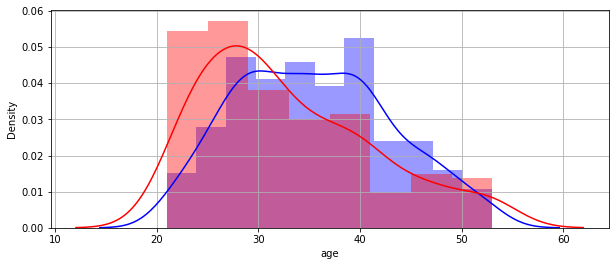

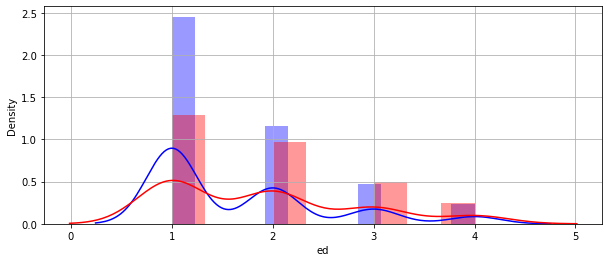

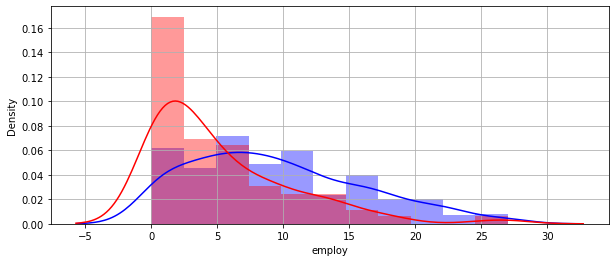

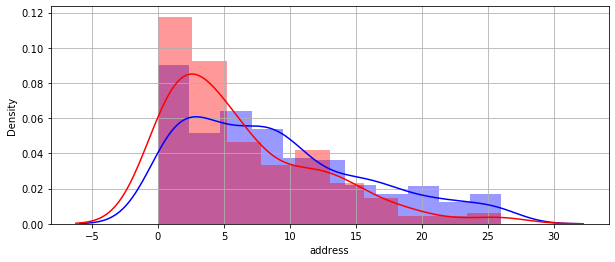

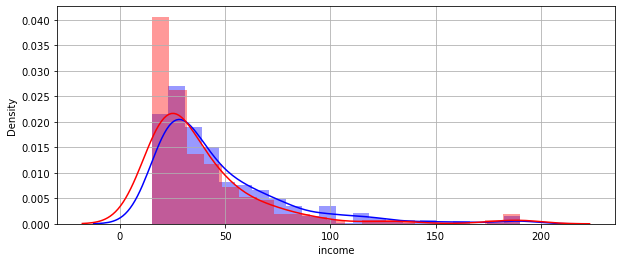

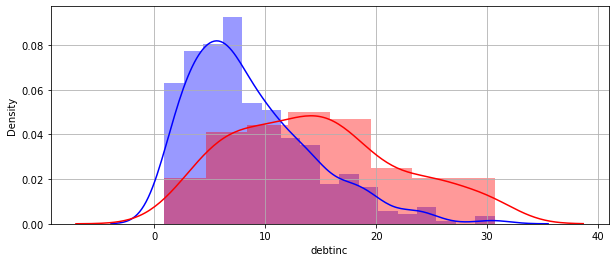

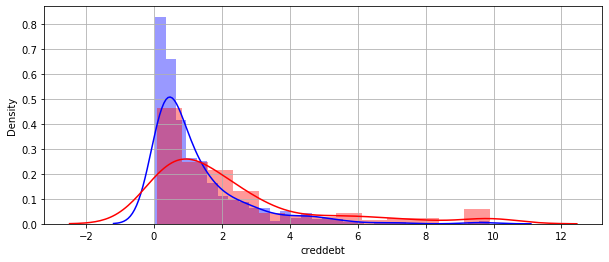

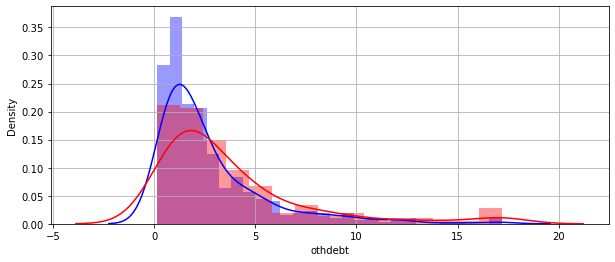

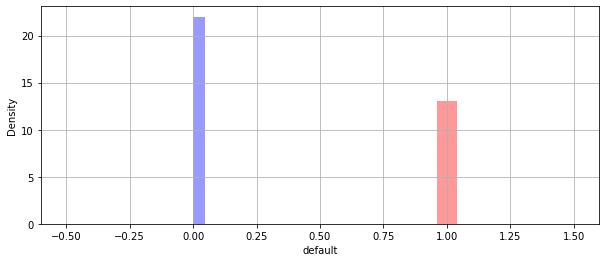

In [80]:
for num in numeric_variables.columns:
    fig,axes=plt.subplots(figsize=(10,4))
    sns.distplot(df_bank_loans_exisitng[df_bank_loans_exisitng['default']==0][num],color='b',label='Not_default', hist=True, norm_hist=False)
    sns.distplot(df_bank_loans_exisitng[df_bank_loans_exisitng['default']==1][num],color='r',label='default', hist=True, norm_hist=False)
    #plt.show()
    plt.xlabel(num)
    #plt.legend()

In [81]:
train_features=df_bank_loans_exisitng.columns.difference(['default'])
train_X,test_X=train_test_split(df_bank_loans_exisitng,test_size=0.3,random_state=42)
train_X.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

### logistic regression via statistical model

In [82]:
logreg=sm.logit(formula='default ~ ' + '+'.join(train_features),data=train_X)
result=logreg.fit()
summ=result.summary()
summ

Optimization terminated successfully.
         Current function value: 0.425391
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  490
Model:                          Logit   Df Residuals:                      481
Method:                           MLE   Df Model:                            8
Date:                Wed, 06 Jul 2022   Pseudo R-squ.:                  0.2749
Time:                        11:54:35   Log-Likelihood:                -208.44
converged:                       True   LL-Null:                       -287.47
Covariance Type:            nonrobust   LLR p-value:                 4.065e-30
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3844      0.736     -1.881      0.060      -2.827       0.058
address       -0.0853      0.026     -3.306      0.001      -0.136      -0.035
age            0.0389      0.020      1.924      0.054      -0.001       0.078
creddebt       0.6410      0.139      4.628      0.000       0.370       0.912
debtinc        0.0353      0.039      0.907      0.365      -0.041       0.112
ed             0.0080      0.142      0.056      0.955      -0.271       0.287
employ        -0.2650      0.040     -6.641      0.000      -0.343      -0.187
income        -0.0089      0.012     -0.721      0.471      -0.033       0.015
othdebt        0.1249      0.102      1.226      0.220      -0.075       0.325
==============================================================================
"""

## AUC SCORE

In [83]:
AUC=metrics.roc_auc_score(train_X['default'],result.predict(train_X))
print('The auc score is ',AUC)

The auc score is  0.8408309575716921
